## Final Project Submission

Please fill out:
* Student name: Candy Gudda
* Student pace: Full time
* Scheduled project review date/time: Friday 15th September, 12 noon
* Instructor name: Nikita Njoroge, Samuel Karu, Lucille Kaleha, Diana Mongina 
* Blog post URL:


#  Microsoft Movie Studio Market Research and Strategy

We shall be exploring which movies are currently doing the best in Box Office

# Importing Libraries


In [1]:
# Your code here - remember to use markdown cells for comments as well!
#Importing libraries

import pandas as pd
import sqlite3
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




 ## Loading and Previewing the datasets


IMBD Dataset (im.db)

creating a connection


In [2]:
conn = sqlite3.connect("zippedData/im.db")

In [131]:
#Defining a function for reading sql data
def sql_data(query):
    return pd.read_sql(query, conn)

In [4]:
#loading datasets
sql_data("SELECT* FROM sqlite_master;")

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [5]:
#loading the dataset
Basics = sql_data("SELECT* FROM movie_basics;")
Basics


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [6]:
#loading the dataset
Ratings = sql_data("SELECT* FROM movie_ratings;")
Ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


TMDB.MOVIES.csv dataset

In [132]:
#loading the dataset
movies = pd.read_csv("zippedData/tmdb.movies.csv", index_col= 0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


BOM.MOVIE_GROSS.csv dataset

In [8]:
#loading the dataset
Budgets = pd.read_csv("zippedData/bom.movie_gross.csv")
Budgets

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


# Data Cleaning

### Cleaning Basics dataframe

In [9]:

Basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [10]:
Basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [11]:
#Checking if there are any null values in the dataframe
Basics.isnull().any()

movie_id           False
primary_title      False
original_title      True
start_year         False
runtime_minutes     True
genres              True
dtype: bool

In [12]:
#1. Calculate the total number of null values
#Checking the number of null values in each column
null_count = Basics.isnull().sum()
null_count

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [13]:
#2. Calculate the total number of values(non-null)
total_count = Basics.shape[0]
total_count

146144

In [14]:
#3. Calculate the percentage of nulls for each column
percentage = (null_count/total_count)*100
percentage

movie_id            0.000000
primary_title       0.000000
original_title      0.014369
start_year          0.000000
runtime_minutes    21.717621
genres              3.700460
dtype: float64

The above cell shows there is a small percentage of null values, we can do away with them

In [15]:
# Droping the null values in the original_title column
Basics.dropna(subset=['original_title'], inplace=True)

In [16]:
#Checking the null values in all columns to ascertain those in original_title have been dropped 
Basics.isnull().sum()

movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes    31722
genres              5389
dtype: int64

I'll drop the original_title column since it is not as important to me. I'll be using the primary title instead

In [17]:
# drop original_title column

Basics.drop(labels= "original_title",axis = 1, inplace = True)

In [18]:
#Dropping the null values in the genres column
Basics.dropna(subset=['genres'], inplace=True)

In [19]:
#Checking the null values to ascertain the null values in the genres column have been dropped and the original_title has been dropped
Basics.isnull().sum()

movie_id               0
primary_title          0
start_year             0
runtime_minutes    28502
genres                 0
dtype: int64

The number of null values in runtime_minutes is big therefore i'm going to replace them with the mean value

In [20]:
#Fill the null values in the runtime_minutes column with the mean
Basics['runtime_minutes'].fillna(Basics['runtime_minutes'].mean(), inplace=True)

In [21]:
#Checking the null values to asertain we dont have any null values in any column
Basics.isnull().any()

movie_id           False
primary_title      False
start_year         False
runtime_minutes    False
genres             False
dtype: bool

In [22]:
#Checking for duplicates
Basics.duplicated().sum()

0

In [23]:
#Checking the dataframe's info to ensure we have entries in all columns
Basics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140734 entries, 0 to 146143
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         140734 non-null  object 
 1   primary_title    140734 non-null  object 
 2   start_year       140734 non-null  int64  
 3   runtime_minutes  140734 non-null  float64
 4   genres           140734 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.4+ MB


In [24]:
Basics.head()

,movie_id,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.000000,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.000000,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.000000,Drama
3,tt0069204,Sabse Bada Sukh,2018,86.261556,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.000000,"Comedy,Drama,Fantasy"


I have cleaned the dataframe and ensured there are no missing values or duplicates in the dataframe

### Cleaning Ratings dataframe

In [25]:
Ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [26]:
Ratings.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [27]:
#Checking if there are any null values in the dataframe
Ratings.isnull().any()

movie_id         False
averagerating    False
numvotes         False
dtype: bool

In [28]:
#Checking for duplicates 
Ratings.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
73851    False
73852    False
73853    False
73854    False
73855    False
Length: 73856, dtype: bool

The above dataframe is clean

### Cleaning Budgets dataframe


In [29]:
Budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [30]:
Budgets.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


In [31]:
#Checking if there are any null values in the dataframe
Budgets.isnull().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [32]:
#1. Calculate the total number of null values
#Checking the number of null values in each column
null_count = Budgets.isnull().sum()
null_count

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [33]:
#2. Calculate the total number of values(non-null)
total_count = Budgets.shape[0]
total_count

3387

In [34]:
#3. Calculate the percentage of nulls for each column
percentage= (null_count/ total_count)*100
percentage

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

The above cell shows the percentage of null values and we going to do away with them

In [35]:
#Dropping the null values in the studio column
Budgets.dropna(subset=['studio'], inplace = True)

In [36]:
#Dropping the null values in the domestic_gross column
Budgets.dropna(subset = ['domestic_gross'], inplace = True)

In [37]:
#Dropping the null values in the foreign_gross column
Budgets.dropna(subset = ['foreign_gross'], inplace = True)

In [38]:
Budgets.value_counts()

title                           studio   domestic_gross  foreign_gross  year
xXx: The Return of Xander Cage  Par.     44900000.0      301200000      2017    1
I Am Number Four                BV       55100000.0      94800000       2011    1
How to Be Single                WB (NL)  46800000.0      65500000       2016    1
How to Train Your Dragon        P/DW     217600000.0     277300000      2010    1
How to Train Your Dragon 2      Fox      177000000.0     444500000      2014    1
                                                                               ..
Source Code                     Sum.     54700000.0      92600000       2011    1
South of the Border             CLS      199000.0        70800          2010    1
Southpaw                        Wein.    52400000.0      39500000       2015    1
Southside with You              RAtt.    6300000.0       208000         2016    1
'71                             RAtt.    1300000.0       355000         2015    1
Length: 2007, dtype: 

In [39]:
#Checking the dataframe's info to acertain all columns have entries
Budgets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


Changing foreign_gross column format

In [137]:
#Convert "foreign_gross" column to numeric, coercing errors to NaN
Budgets["foreign_gross"] = pd.to_numeric(Budgets["foreign_gross"], errors="coerce")

# Replace NaN values with 0 in "foreign_gross" column
Budgets["foreign_gross"].replace(np.nan, 0, inplace=True)

# Calculate Total_gross and add it as a new column
Budgets["Total_gross"] = Budgets["foreign_gross"] + Budgets["domestic_gross"]

# Display the updated DataFrame with the new "Total_gross" column
print(Budgets["Total_gross"])
Budgets.head()

0       1.067000e+09
1       1.025500e+09
2       9.603000e+08
3       8.283000e+08
4       7.526000e+08
            ...     
3275    1.501400e+06
3286    9.540000e+05
3309    2.660000e+05
3342    9.840000e+04
3353    7.320000e+04
Name: Total_gross, Length: 2007, dtype: float64


,title,studio,domestic_gross,foreign_gross,year,Total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


Cleaning Movies dataframe

In [42]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [43]:
movies.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [44]:
movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


I'll drop the original title and remain with the title column


In [45]:
# drop original_title column

movies.drop(labels= "original_title",axis = 1, inplace = True)

In [46]:
movies.dtypes

genre_ids             object
id                     int64
original_language     object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In [47]:
#Turning the release date column to date time
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [48]:
#Checking the release date column has been changed
movies.dtypes

genre_ids                    object
id                            int64
original_language            object
popularity                  float64
release_date         datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [49]:
#Checking for any null values in the dataframe
movies.isnull().any()

genre_ids            False
id                   False
original_language    False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [50]:
movies.head()

,genre_ids,id,original_language,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,27.920,2010-07-16,Inception,8.3,22186


Joining movie_basics and movie_ratings tables

In [51]:
Basics_ratings =sql_data("""SELECT * FROM  movie_basics
        LEFT JOIN  movie_ratings
        USING (movie_id) """)
Basics_ratings

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


In [52]:
Basics_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


Changing genres from object to string type

In [53]:
#Convert the 'genres' column to strings
genre_str = Basics_ratings['genres'].astype(str)
genre_str

0           Action,Crime,Drama
1              Biography,Drama
2                        Drama
3                 Comedy,Drama
4         Comedy,Drama,Fantasy
                  ...         
146139                   Drama
146140             Documentary
146141                  Comedy
146142                     nan
146143             Documentary
Name: genres, Length: 146144, dtype: object

In [54]:
 #Split the genres into a list of genres
Basics_ratings['genres'] = genre_str.str.split(',')
Basics_ratings['genres']

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146142                       [nan]
146143               [Documentary]
Name: genres, Length: 146144, dtype: object

Joining the genres column and and average ratings column

In [55]:
genre_ratings=Basics_ratings [["genres","averagerating"]]
genre_ratings

,genres,averagerating
0,"[Action, Crime, Drama]",7.0
1,"[Biography, Drama]",7.2
2,[Drama],6.9
3,"[Comedy, Drama]",6.1
4,"[Comedy, Drama, Fantasy]",6.5
...,...,...
146139,[Drama],NaN
146140,[Documentary],NaN
146141,[Comedy],NaN
146142,[nan],NaN


In [56]:
#Create a new DataFrame with each genre in separate rows
genre_list = []
for index, row in Basics_ratings.iterrows():
    averagerating = row['averagerating']
    genres = row['genres']
    for genre in genres:
        genre_list.append({'averagerating': averagerating, 'genres': genre})

genre_avg = pd.DataFrame(genre_list)
genre_avg

,averagerating,genres
0,7.0,Action
1,7.0,Crime
2,7.0,Drama
3,7.2,Biography
4,7.2,Drama
...,...,...
234953,NaN,Drama
234954,NaN,Documentary
234955,NaN,Comedy
234956,NaN,nan


In [124]:
genre_avg.dropna(subset=['averagerating'], inplace=True)

In [125]:
#Create a new DataFrame with each genre in separate rows
genre_list = []
for index, row in Basics_ratings.iterrows():
    runtime_minutes = row['runtime_minutes']
    genres = row['genres']
    for genre in genres:
        genre_list.append({'runtime_minutes': runtime_minutes, 'genres': genre})

new_Basics_ratings = pd.DataFrame(genre_list)
new_Basics_ratings

,runtime_minutes,genres
0,175.0,Action
1,175.0,Crime
2,175.0,Drama
3,114.0,Biography
4,114.0,Drama
...,...,...
234953,123.0,Drama
234954,NaN,Documentary
234955,NaN,Comedy
234956,116.0,nan


In [123]:
genre_data = []
for index,record in Basics_ratings.iterrows():
    genre_list = record["genres"]
    if len(genre_list) >1:
        for individual in genre_list:
            genre_data.append({individual:Basics_ratings.at[index,"averagerating"]})
    elif len(genre_list) ==1:
        genre_data.append({genre_list[0]:Basics_ratings.at[index,"averagerating"]})

genre_data
# this section of cde assigns a rating to every iteration of the genre

[{'Action': 7.0},
 {'Crime': 7.0},
 {'Drama': 7.0},
 {'Biography': 7.2},
 {'Drama': 7.2},
 {'Drama': 6.9},
 {'Comedy': 6.1},
 {'Drama': 6.1},
 {'Comedy': 6.5},
 {'Drama': 6.5},
 {'Fantasy': 6.5},
 {'Comedy': nan},
 {'Horror': 4.1},
 {'Thriller': 4.1},
 {'Adventure': 8.1},
 {'Animation': 8.1},
 {'Comedy': 8.1},
 {'Documentary': nan},
 {'History': nan},
 {'Biography': nan},
 {'Drama': 6.8},
 {'History': 4.6},
 {'Documentary': 7.6},
 {'Drama': 6.9},
 {'Documentary': 7.5},
 {'Animation': 7.8},
 {'Drama': 7.8},
 {'History': 7.8},
 {'nan': nan},
 {'Drama': 4.0},
 {'Drama': 8.8},
 {'Drama': 4.0},
 {'Mystery': 4.0},
 {'Action': 1.9},
 {'Animation': 1.9},
 {'Comedy': 1.9},
 {'Crime': 6.7},
 {'Drama': 6.7},
 {'nan': 6.6},
 {'Biography': 5.9},
 {'Comedy': 5.9},
 {'Drama': 5.9},
 {'Documentary': 7.8},
 {'Documentary': nan},
 {'Drama': 7.1},
 {'Action': 7.4},
 {'Drama': 7.4},
 {'Documentary': 7.0},
 {'History': 7.0},
 {'Sci-Fi': 6.6},
 {'Comedy': 3.9},
 {'Documentary': 7.4},
 {'Thriller': 6.6},
 {'

The  dataframes are all clean and now ready for analysis

# Exploratory Data Analysis


## Question 1:

### Which is the most produced genre?

In [113]:
new_Basics_ratings.head()

,runtime_minutes,genres
0,175.0,Action
1,175.0,Crime
2,175.0,Drama
3,114.0,Biography
4,114.0,Drama


In [114]:
Most_produced_genre =new_Basics_ratings['genres'].value_counts()
Most_produced_genre.head()

Documentary    51640
Drama          49883
Comedy         25312
Thriller       11883
Horror         10805
Name: genres, dtype: int64

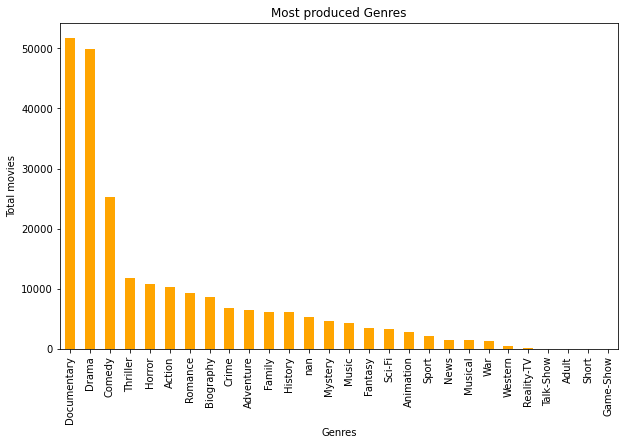

In [117]:
# Plot a bar graph

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data on the specified axis as a horizontal bar plot
Most_produced_genre.plot(kind ='bar', color = 'orange')

# Set the title, labels, and other formatting
ax.set_title('Most produced Genres')
ax.set_xlabel('Genres')
ax.set_ylabel('Total movies')

# Display the plot
plt.show()


From the plot above we can see that the most produced genre is Documentaries

## Question 2:
### Which is the best runtime for movies?

In [62]:
new_Basics_ratings['runtime_minutes'].mean()

86.62789427474681

In [63]:
new_Basics_ratings['runtime_minutes'].median()

88.0

In [64]:
new_Basics_ratings['runtime_minutes'].describe()

count    195904.000000
mean         86.627894
std         132.390546
min           1.000000
25%          71.000000
50%          88.000000
75%         100.000000
max       51420.000000
Name: runtime_minutes, dtype: float64

The best average runtime minutes of a movies is between 86-88 minutes

## Question 3:

### Which are the top original movie languages?

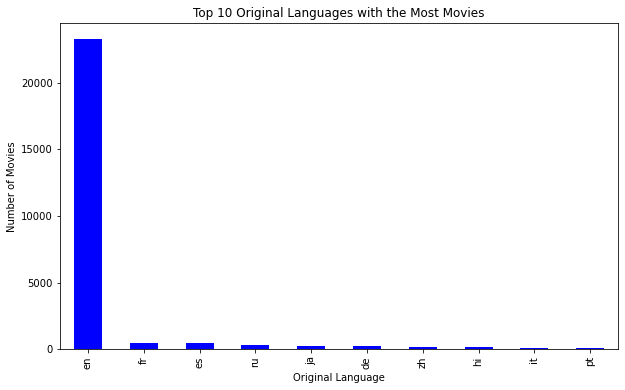

In [65]:
# Group the data by original_language and count the number of movies in each language
language_counts = movies['original_language'].value_counts()
# Top 10 original languages
Top_10 = language_counts.head(10)

# Create a figure 
plt.figure(figsize=(10, 6))

# Plot the data on the specified axis as a bar plot
Top_10.plot(kind='bar', color='blue')

# Set the titles and  labels
plt.title('Top 10 Original Languages with the Most Movies')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')

# Display the plot
plt.show()

From the plot above we can see that most movies have English as their original languages of production

## Question 4:
### The difference in domestic gross and foreign gross of movies over the years?


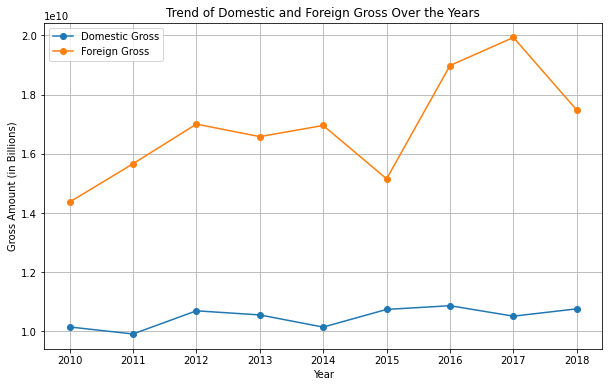

In [94]:
# Group the data by year and calculate the total domestic and foreign gross for each year
yearly_gross = Budgets.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Create a figure
plt.figure(figsize=(10, 6))

#Plot the line graph
plt.plot(yearly_gross.index, yearly_gross['domestic_gross'], marker='o', label='Domestic Gross')
plt.plot(yearly_gross.index, yearly_gross['foreign_gross'], marker='o', label='Foreign Gross')

# Set the titles and labels
plt.title('Trend of Domestic and Foreign Gross Over the Years')
plt.xlabel('Year')
plt.ylabel('Gross Amount (in Billions)')
plt.legend()
plt.grid()

#Display plot
plt.show()

From the plot we can see that over the years the foreign gross was way higher than then domestic gross

## Question 5:
### Which studios have made the highest total gross over the years?

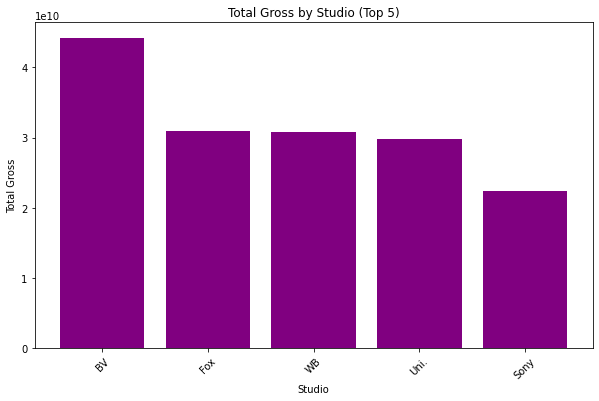

In [139]:
# Group data by studio
grouped = Budgets.groupby("studio")

# Get the top 5 studios by Total Gross
top_studios = grouped["Total_gross"].sum().sort_values(ascending=False).head().index

# Create a figure
plt.figure(figsize=(10, 6))

# Plot the data on the specified axis as a bar plot
plt.bar(top_studios, grouped["Total_gross"].sum().sort_values(ascending=False).head(), color='purple')

#Set the titles and lables
plt.xlabel("Studio")
plt.ylabel("Total Gross")
plt.title("Total Gross by Studio (Top 5)")
plt.xticks(rotation=45)

#Show plot
plt.show()

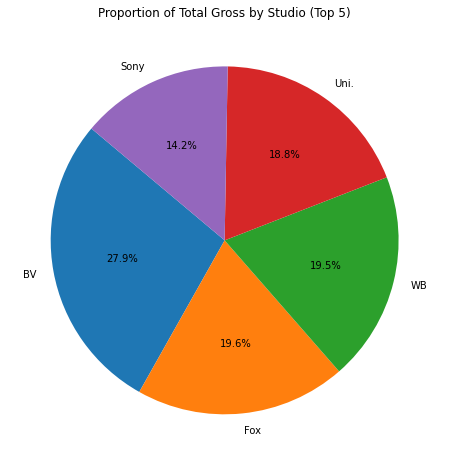

In [105]:
#Pie chart showing the proportion of total gross by studio
# Create a figure
plt.figure(figsize=(8, 8))

#Plot pie chart
plt.pie(grouped["Total_gross"].sum().sort_values(ascending=False).head(), labels=top_studios, autopct='%1.1f%%', startangle=140)

#Set titles
plt.title("Proportion of Total Gross by Studio (Top 5)")

#Show plot
plt.show()

From the graph and pie chart above we are able to see that BV studio made the highest total gross compared to other studios

## Question 6:
### Which genre has the highest runtime?

In [67]:
 # Group by genre and calculate the mean runtime
Highest_runtime = new_Basics_ratings.groupby('genres')['runtime_minutes'].mean().sort_values()
Highest_runtime.head()

genres
Short          16.400000
News           66.418635
Documentary    72.107879
Biography      74.129960
History        78.756430
Name: runtime_minutes, dtype: float64

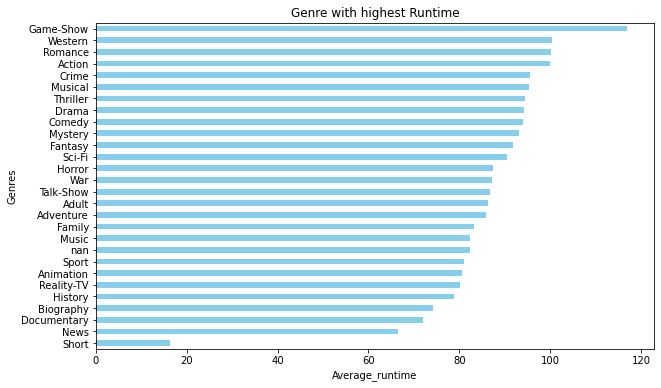

In [140]:
# Plot a bar graph

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data on the specified axis as a horizontal bar plot
Highest_runtime.plot(kind ='barh', color = 'skyblue')

# Set the title, labels, and other formatting
ax.set_title('Genre with highest Runtime')
ax.set_xlabel('Average_runtime')
ax.set_ylabel('Genres')

# Display the plot
plt.show()


From the plot above the genre with the highest average runtime minutes is Game- Show

# Question 7:

## Which studios have produced most movies?

In [106]:
Most_movies_produced =Budgets['studio'].value_counts()
Most_movies_produced

Uni.         144
Fox          134
WB           130
Sony         105
BV           104
            ... 
Good Deed      1
Argo.          1
CP             1
3D             1
Orch.          1
Name: studio, Length: 172, dtype: int64

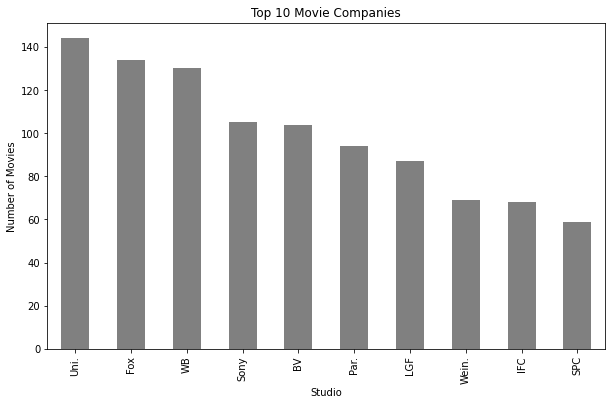

In [111]:
# Plot a bar graph

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data on the specified axis as a horizontal bar plot
Most_movies_produced.head(10).plot(kind='bar', color = 'grey', ax=ax)

# Set the title, labels, and other formatting
ax.set_title('Top 10 Movie Companies')
ax.set_xlabel('Studio')
ax.set_ylabel('Number of Movies')

# Display the plot
plt.show()

From the plot universal studio has produced the most number of movies.

# Conclusion


## Based on the datasets I used and analysed in this project:
### 1. The most produced genre of movies is Documentaries.

### 2. The average runtime minutes for movies is between 86 minutes and 88 minutes.

### 3. Over the years most movie companies have made a higher foreign gross income compared to domestic gross income.

### 4. The most used/top original language used to produce movies is English(en).

### 5. The genre with the highest average runtime minutes is Game-Show.

### 6. Universal studio is currenty the top producing movie company.